In [1]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
import warnings
sns.set()
import matplotlib.pyplot as plt
%matplotlib inline
warnings.filterwarnings('ignore')

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score,roc_curve,auc, roc_auc_score, classification_report, confusion_matrix
from sklearn.ensemble import BaggingClassifier,RandomForestClassifier

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

In [2]:
df=pd.read_csv("Data.csv")

In [3]:
pd.set_option('display.max_columns', None)

In [4]:
df.head()

,destination,passanger,weather,temperature,coupon,expiration,gender,age,maritalStatus,has_children,education,occupation,income,car,Bar,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Accept(Y/N?)
0,No Urgent Place,Alone,Sunny,55,Restaurant(<20),1d,Female,21,Unmarried partner,1,Some college - no degree,Unemployed,$37500 - $49999,NaN,never,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,Coffee House,2h,Female,21,Unmarried partner,1,Some college - no degree,Unemployed,$37500 - $49999,NaN,never,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,Carry out & Take away,2h,Female,21,Unmarried partner,1,Some college - no degree,Unemployed,$37500 - $49999,NaN,never,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,Coffee House,2h,Female,21,Unmarried partner,1,Some college - no degree,Unemployed,$37500 - $49999,NaN,never,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,Coffee House,1d,Female,21,Unmarried partner,1,Some college - no degree,Unemployed,$37500 - $49999,NaN,never,never,NaN,4~8,1~3,1,1,0,0,1,0


In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
temperature,12684.0,63.301798,19.154486,30.0,55.0,80.0,80.0,80.0
has_children,12684.0,0.414144,0.492593,0.0,0.0,0.0,1.0,1.0
toCoupon_GEQ5min,12684.0,1.000000,0.000000,1.0,1.0,1.0,1.0,1.0
toCoupon_GEQ15min,12684.0,0.561495,0.496224,0.0,0.0,1.0,1.0,1.0
toCoupon_GEQ25min,12684.0,0.119126,0.323950,0.0,0.0,0.0,0.0,1.0
direction_same,12684.0,0.214759,0.410671,0.0,0.0,0.0,0.0,1.0
direction_opp,12684.0,0.785241,0.410671,0.0,1.0,1.0,1.0,1.0
Accept(Y/N?),12684.0,0.568433,0.495314,0.0,0.0,1.0,1.0,1.0


In [6]:
print("No of Duplicate Rows==",df.duplicated().sum())

No of Duplicate Rows== 291


In [7]:
df.loc[df.duplicated(),:]

,destination,passanger,weather,temperature,coupon,expiration,gender,age,maritalStatus,has_children,education,occupation,income,car,Bar,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Accept(Y/N?)
30,No Urgent Place,Friend(s),Sunny,80,Coffee House,2h,Male,21,Single,0,Bachelors degree,Architecture & Engineering,$62500 - $74999,NaN,never,less1,4~8,4~8,less1,1,0,0,0,1,0
96,No Urgent Place,Friend(s),Sunny,80,Coffee House,2h,Male,21,Single,0,Associates degree,Student,$12500 - $24999,NaN,1~3,less1,1~3,less1,1~3,1,0,0,0,1,1
162,No Urgent Place,Friend(s),Sunny,80,Coffee House,2h,Male,26,Single,0,Some college - no degree,Healthcare Support,$37500 - $49999,NaN,gt8,gt8,gt8,gt8,gt8,1,0,0,0,1,0
184,No Urgent Place,Friend(s),Sunny,80,Coffee House,2h,Female,26,Single,1,Associates degree,Healthcare Practitioners & Technical,$25000 - $37499,NaN,never,1~3,4~8,1~3,less1,1,0,0,0,1,1
201,No Urgent Place,Friend(s),Sunny,80,Coffee House,2h,Male,21,Single,0,Some college - no degree,Sales & Related,$100000 or More,NaN,less1,never,gt8,1~3,less1,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10454,No Urgent Place,Kid(s),Sunny,80,Coffee House,1d,Female,36,Divorced,1,Some college - no degree,Office & Administrative Support,$25000 - $37499,NaN,never,gt8,4~8,4~8,less1,1,0,0,0,1,1
10515,No Urgent Place,Kid(s),Sunny,80,Coffee House,1d,Female,50plus,Married partner,1,Bachelors degree,Unemployed,$87500 - $99999,NaN,never,4~8,1~3,4~8,1~3,1,0,0,0,1,1
10592,No Urgent Place,Kid(s),Sunny,80,Coffee House,1d,Female,26,Married partner,1,Bachelors degree,Arts Design Entertainment Sports & Media,$50000 - $62499,NaN,never,never,less1,less1,less1,1,0,0,0,1,0
10670,No Urgent Place,Kid(s),Sunny,80,Coffee House,1d,Female,26,Married partner,1,Some college - no degree,Unemployed,$25000 - $37499,NaN,never,never,1~3,less1,never,1,0,0,0,1,0


In [8]:
df.drop_duplicates(inplace=True,keep=False)

In [9]:
df.shape

(12104, 25)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12104 entries, 0 to 12683
Data columns (total 25 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           12104 non-null  object
 1   passanger             12104 non-null  object
 2   weather               12104 non-null  object
 3   temperature           12104 non-null  int64 
 4   coupon                12104 non-null  object
 5   expiration            12104 non-null  object
 6   gender                12104 non-null  object
 7   age                   12104 non-null  object
 8   maritalStatus         12104 non-null  object
 9   has_children          12104 non-null  int64 
 10  education             12104 non-null  object
 11  occupation            12104 non-null  object
 12  income                12104 non-null  object
 13  car                   104 non-null    object
 14  Bar                   11999 non-null  object
 15  CoffeeHouse           11891 non-null  obj

In [11]:
def per_v(df):
    total = df.isnull().sum().sort_values(ascending = False)
    percent = round(df.isnull().sum().sort_values(ascending = False)/len(df)*100,2)
    return pd.concat([total, percent], axis=1, keys=['Total','Percent'])
per_v(df)

,Total,Percent
car,12000,99.14
CoffeeHouse,213,1.76
Restaurant20To50,187,1.54
CarryAway,145,1.20
RestaurantLessThan20,126,1.04
Bar,105,0.87
destination,0,0.00
direction_opp,0,0.00
direction_same,0,0.00
toCoupon_GEQ25min,0,0.00


Here total 6 attributes have missing values, from that 'car' feature we can see 99% of the missing value so we need to drop this feature.
Other features like 'bar', 'coffeehouse', 'carryaway', 'RestaurantLessThan20', and 'Restaurant20To50' have chance 1% of missing value, so we need to fill these missing values with some other value, for that we will use mode imputation.

In [12]:
df.drop(['car'], axis=1, inplace=True)

In [13]:
df['CoffeeHouse'].fillna(df['CoffeeHouse'].mode()[0], inplace=True)
df['Restaurant20To50'].fillna(df['Restaurant20To50'].mode()[0], inplace=True)
df['CarryAway'].fillna(df['CarryAway'].mode()[0], inplace=True)
df['RestaurantLessThan20'].fillna(df['RestaurantLessThan20'].mode()[0], inplace=True)
df['Bar'].fillna(df['Bar'].mode()[0], inplace=True)

In [14]:
df.select_dtypes('int64').nunique()

temperature          3
has_children         2
toCoupon_GEQ5min     1
toCoupon_GEQ15min    2
toCoupon_GEQ25min    2
direction_same       2
direction_opp        2
Accept(Y/N?)         2
dtype: int64

In [15]:
df.select_dtypes('object').nunique()

destination              3
passanger                4
weather                  3
coupon                   5
expiration               2
gender                   2
age                      8
maritalStatus            5
education                6
occupation              25
income                   9
Bar                      5
CoffeeHouse              5
CarryAway                5
RestaurantLessThan20     5
Restaurant20To50         5
dtype: int64

In [16]:
df.isnull().sum()

destination             0
passanger               0
weather                 0
temperature             0
coupon                  0
expiration              0
gender                  0
age                     0
maritalStatus           0
has_children            0
education               0
occupation              0
income                  0
Bar                     0
CoffeeHouse             0
CarryAway               0
RestaurantLessThan20    0
Restaurant20To50        0
toCoupon_GEQ5min        0
toCoupon_GEQ15min       0
toCoupon_GEQ25min       0
direction_same          0
direction_opp           0
Accept(Y/N?)            0
dtype: int64

In [17]:
categorical = df.select_dtypes(include ="object")
print("Categorical Features in DataSet:===",categorical.shape[1])
print(categorical.columns)
print("****"*15)
#numerical features
numerical= df.select_dtypes(include =("float64","int64"))
print("Numerical Features in DataSet:===",numerical.shape[1])
print(numerical.columns)

Categorical Features in DataSet:=== 16
Index(['destination', 'passanger', 'weather', 'coupon', 'expiration', 'gender',
       'age', 'maritalStatus', 'education', 'occupation', 'income', 'Bar',
       'CoffeeHouse', 'CarryAway', 'RestaurantLessThan20', 'Restaurant20To50'],
      dtype='object')
************************************************************
Numerical Features in DataSet:=== 8
Index(['temperature', 'has_children', 'toCoupon_GEQ5min', 'toCoupon_GEQ15min',
       'toCoupon_GEQ25min', 'direction_same', 'direction_opp', 'Accept(Y/N?)'],
      dtype='object')


# EDA

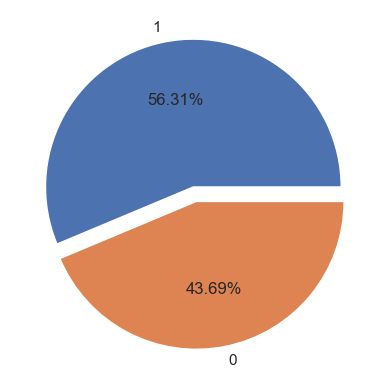

In [18]:
plt.pie(df['Accept(Y/N?)'].value_counts(),labels = df['Accept(Y/N?)'].value_counts().index.tolist(), autopct='%1.2f%%',explode=[0.05]*2)
plt.show()

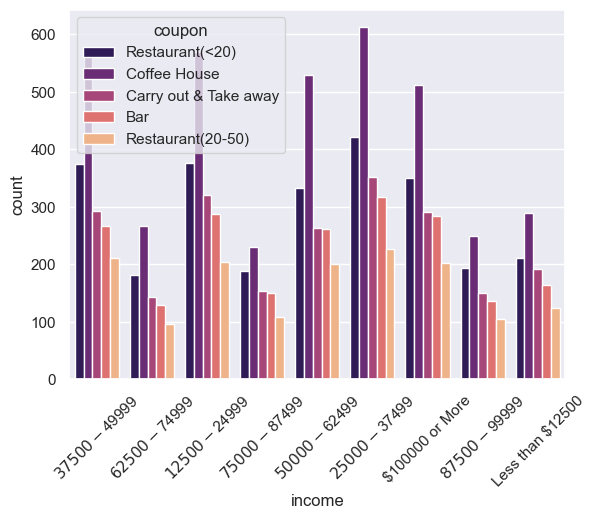

In [19]:

my_plot=sns.countplot(x="income",hue='coupon',data=df,palette='magma')
my_plot.set_xticklabels(my_plot.get_xticklabels(), rotation=45)
plt.show()


<Axes: xlabel='Bar', ylabel='temperature'>

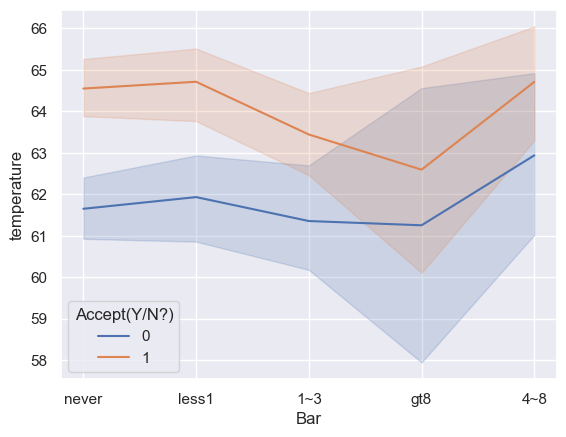

In [20]:
sns.lineplot(x="Bar",y="temperature",hue="Accept(Y/N?)",data=df)

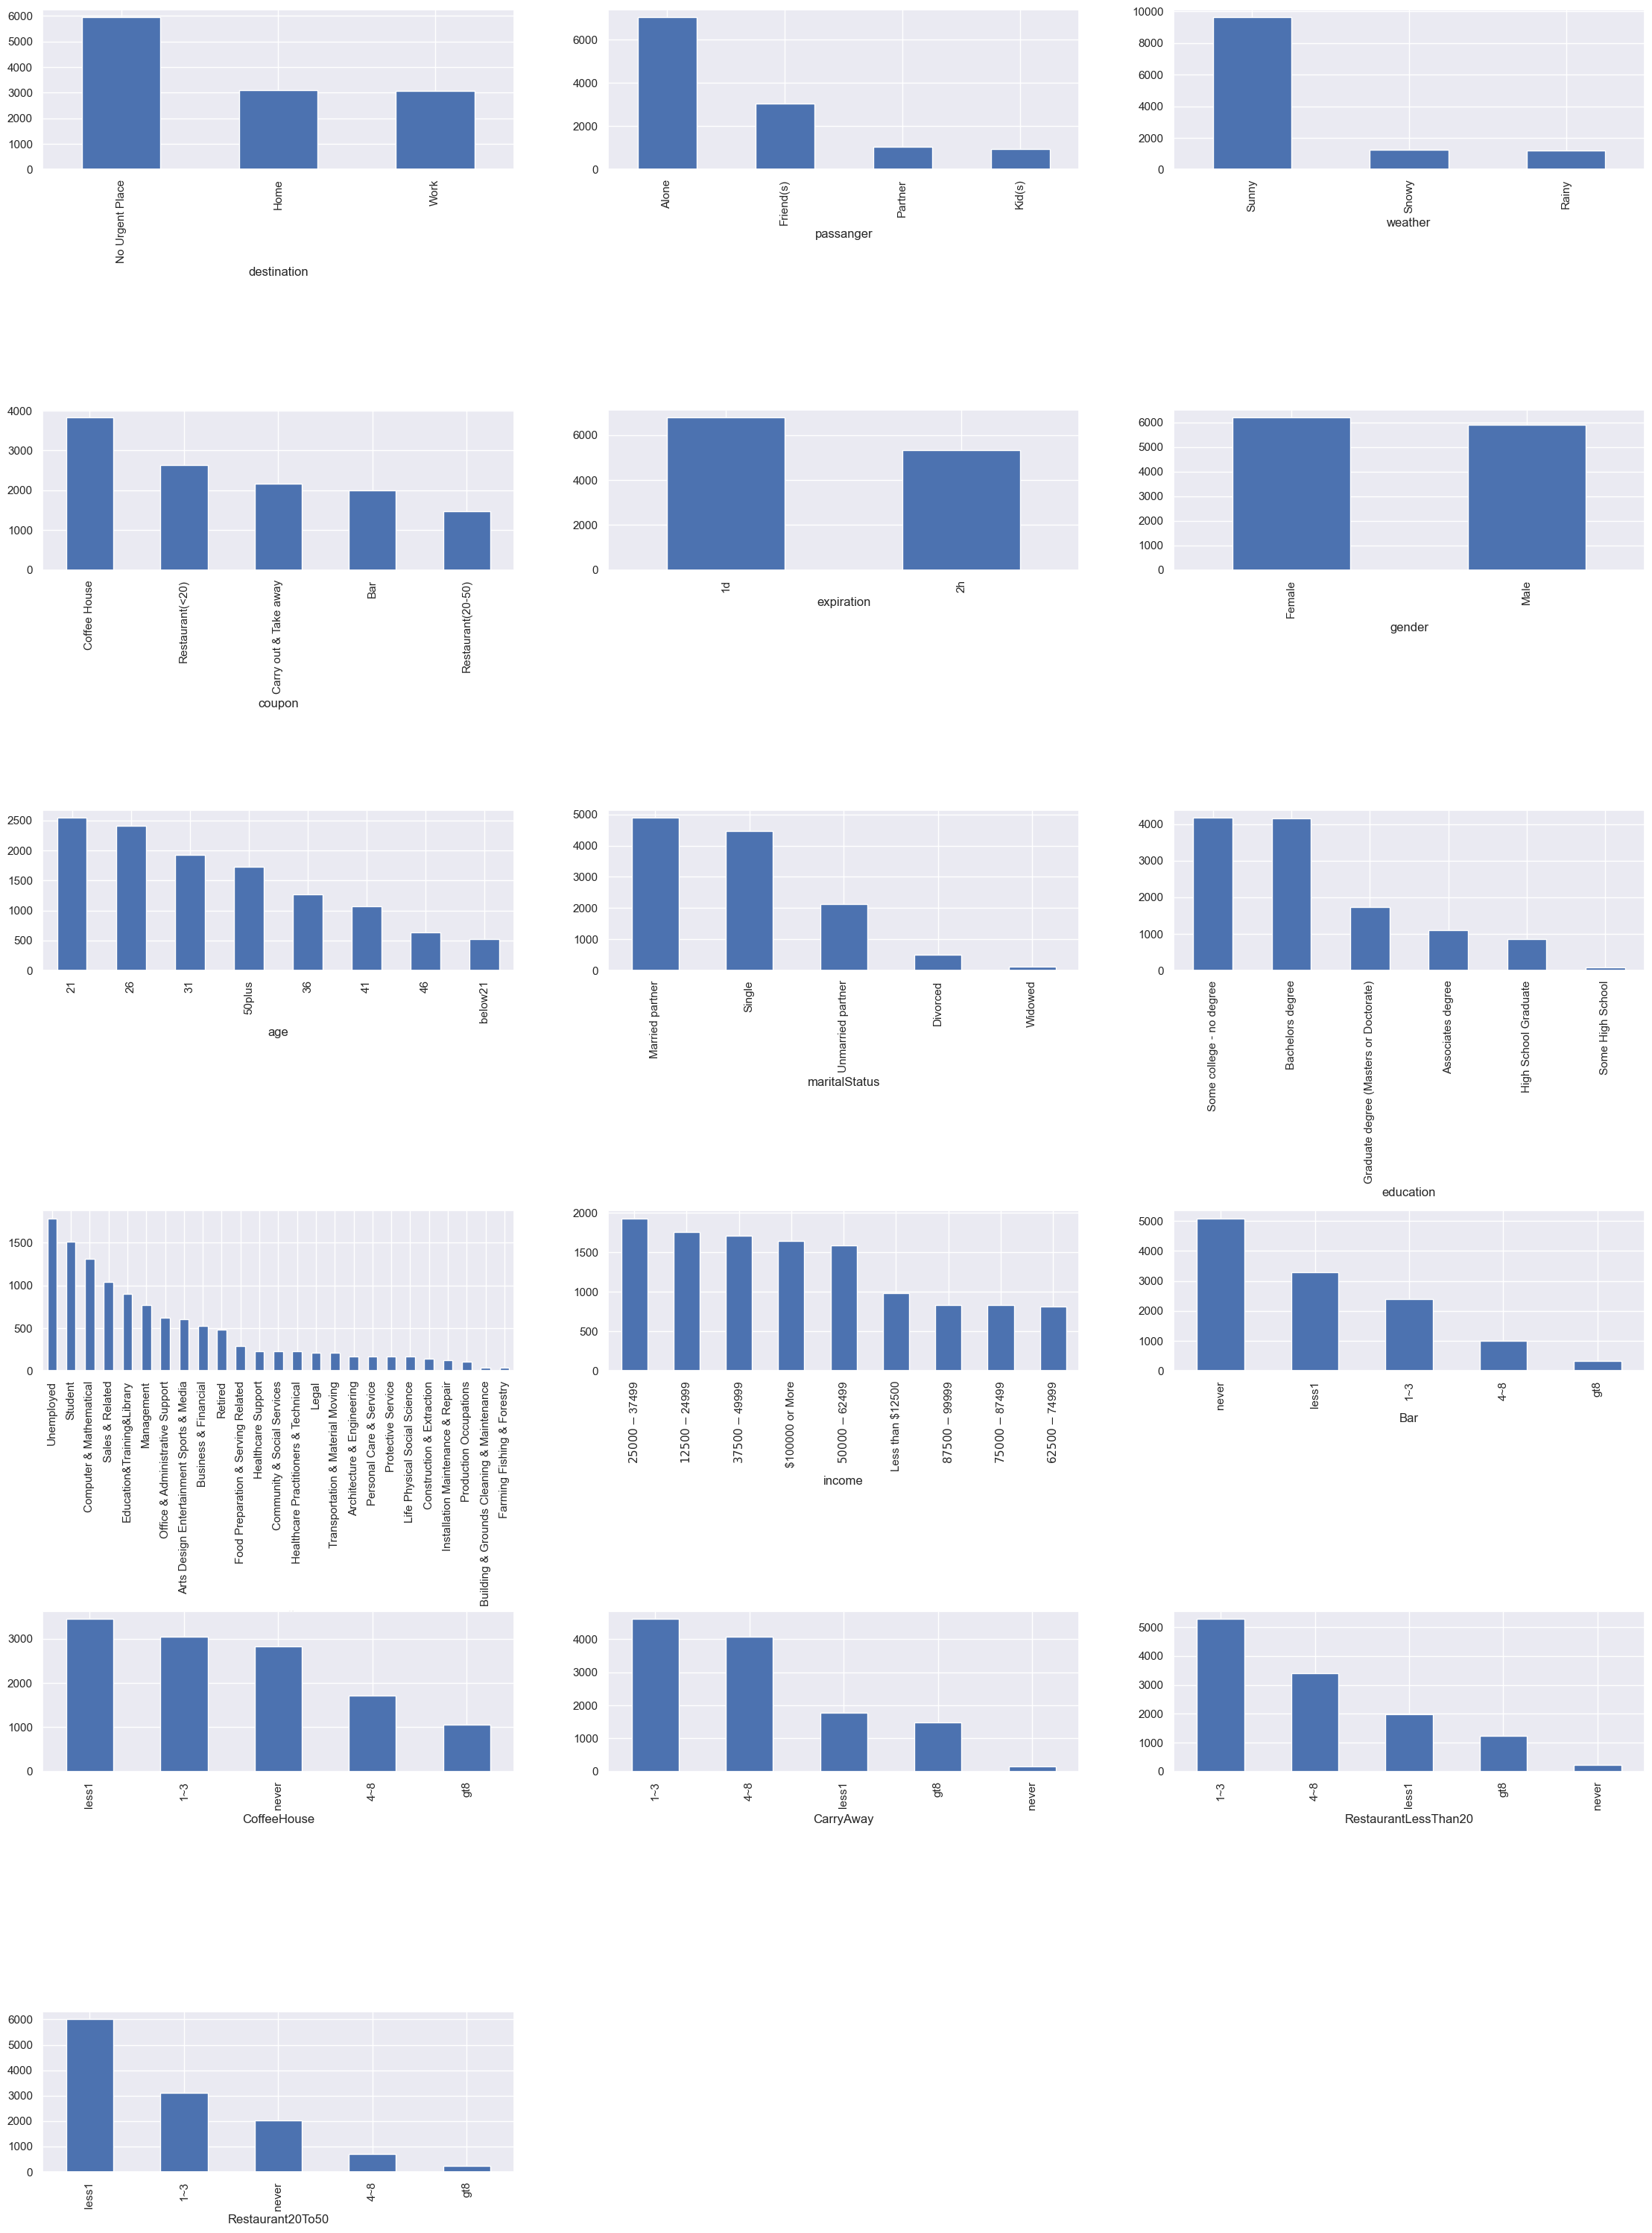

In [21]:
plt.figure(figsize=(20,8))
row = 14
col=3
iterator=1
for i in  categorical:
    plt.subplots_adjust(left=None, bottom=1, right=1.2, top=10, wspace=None, hspace=1.5)
    plt.subplot(row,col,iterator)
   
    df[i].value_counts().plot(kind='bar')
    #plt.title(f'{column.title()}',weight='bold')
    #plt.title(i)
    iterator+=1
    plt.xticks(rotation=90)
    #plt.title(f'Distribution of {var}')
#car_in[i].value_counts()
plt.show()

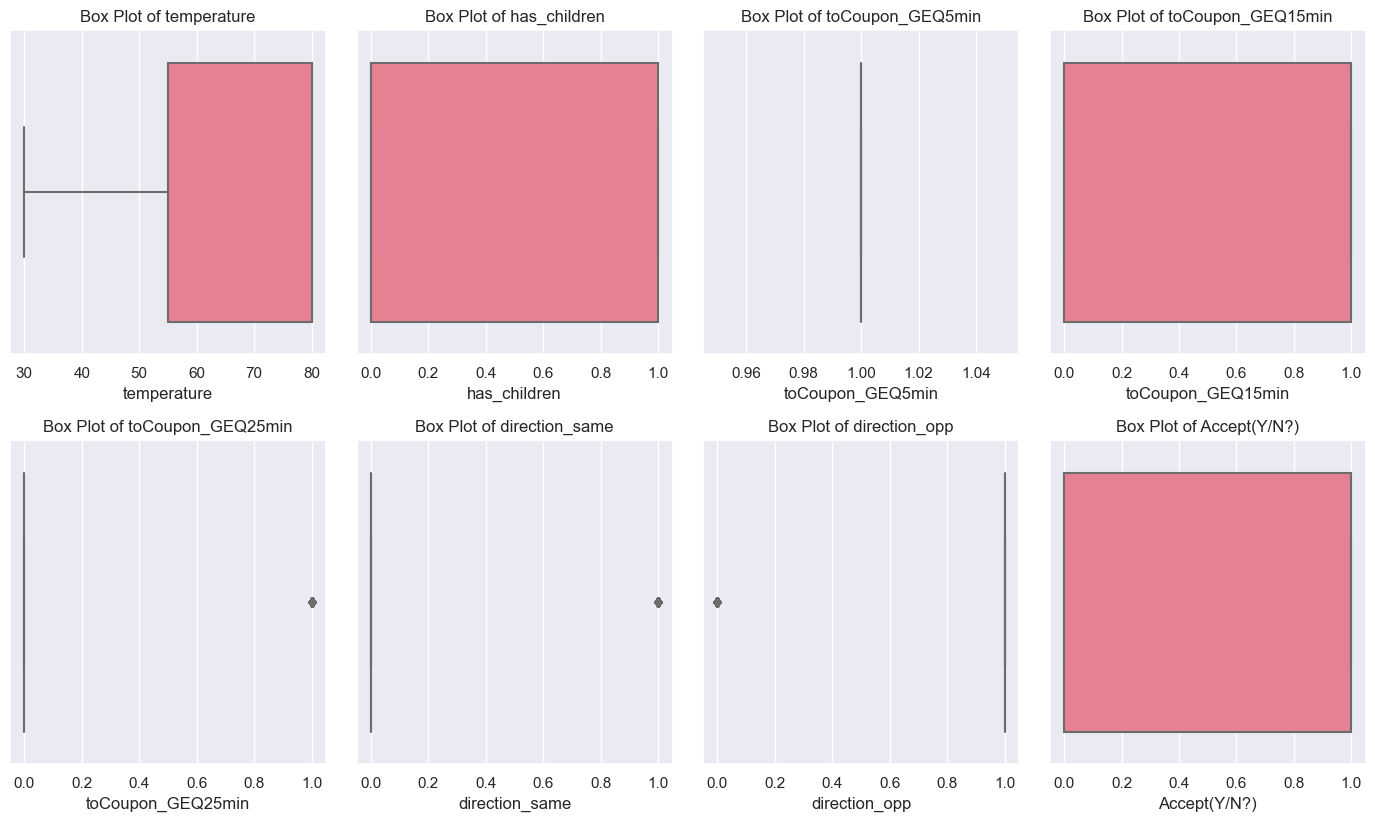

In [22]:
def plot_boxplots_numerical(data):
    # Select only numerical columns from the DataFrame
    numerical_data = data.select_dtypes(include=['number'])

    num_cols = numerical_data.shape[1]
    num_rows = (num_cols - 1) // 3 + 1  # 3 columns per row

    fig, axes = plt.subplots(num_rows, 4, figsize=(14, 4 * num_rows))
    fig.subplots_adjust(hspace=0.5)

    for i, column in enumerate(numerical_data.columns):
        row_idx = i // 4
        col_idx = i % 4
        ax = axes[row_idx, col_idx]
        
        sns.boxplot(x=numerical_data[column], ax=ax,palette="husl")
        ax.set_title(f'Box Plot of {column}')
        ax.set_xlabel(column)

    # Remove empty subplots
    for i in range(num_cols, num_rows * 4):
        fig.delaxes(axes.flatten()[i])

    plt.tight_layout()
    plt.show()
plot_boxplots_numerical(df)

<Axes: xlabel='temperature', ylabel='gender'>

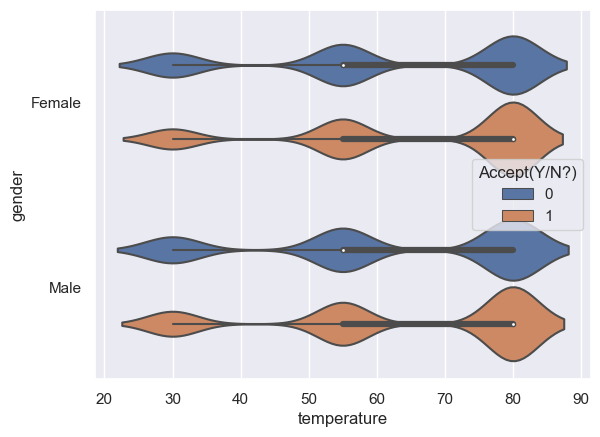

In [23]:
sns.violinplot(data=df, x="temperature", y="gender", hue="Accept(Y/N?)")

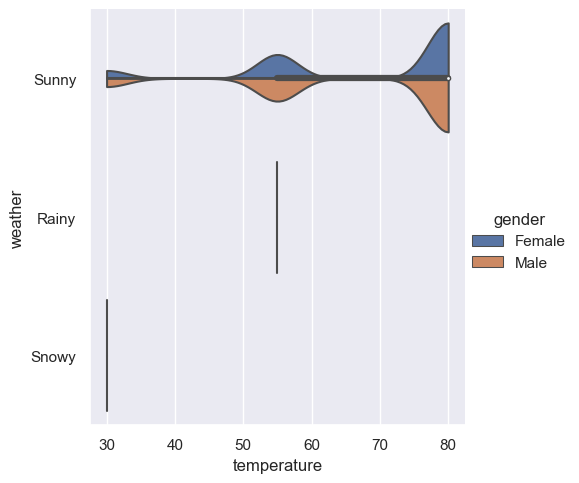

In [24]:
sns.catplot(
    data=df, x="temperature", y="weather", hue="gender",
    kind="violin", bw_adjust=.5, cut=0, split=True,
)

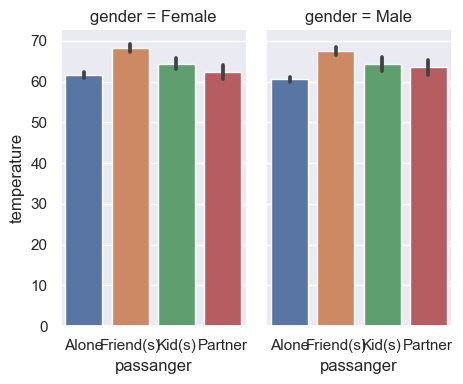

In [25]:
sns.catplot(
    data=df, x="passanger", y="temperature", col="gender",
    kind="bar", height=4, aspect=.6,
)

In [26]:
df['has_children'].value_counts()

has_children
0    7057
1    5047
Name: count, dtype: int64

In [27]:
df.drop(columns=['toCoupon_GEQ5min','direction_opp'], inplace=True)

In [28]:
correlation_check=df.select_dtypes(exclude=['object','category']).corr()
correlation_check

,temperature,has_children,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,Accept(Y/N?)
temperature,1.000000,-0.013792,-0.126284,-0.244641,0.080302,0.066765
has_children,-0.013792,1.000000,0.079028,-0.009393,-0.032874,-0.044277
toCoupon_GEQ15min,-0.126284,0.079028,1.000000,0.318647,-0.290739,-0.090527
toCoupon_GEQ25min,-0.244641,-0.009393,0.318647,1.000000,-0.189090,-0.112398
direction_same,0.080302,-0.032874,-0.290739,-0.189090,1.000000,0.018127
Accept(Y/N?),0.066765,-0.044277,-0.090527,-0.112398,0.018127,1.000000


<Axes: >

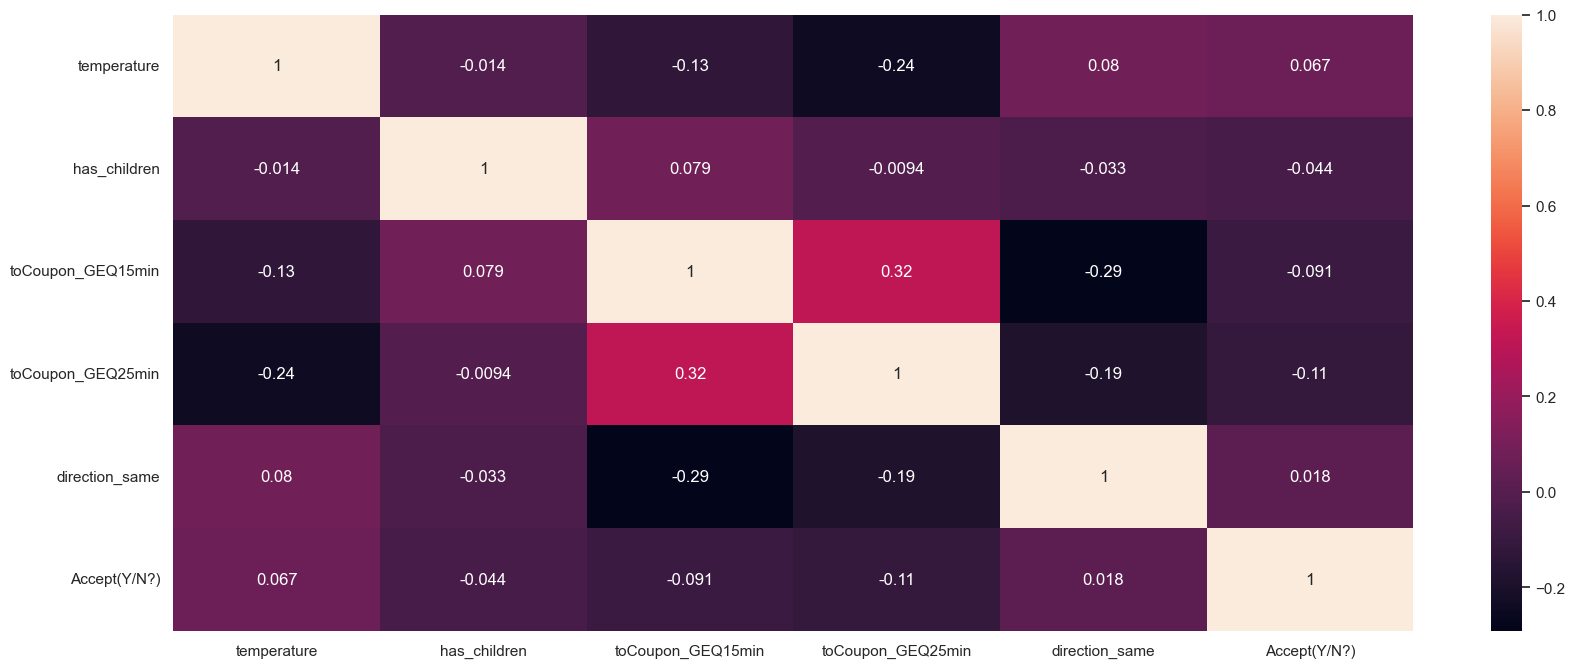

In [29]:
plt.figure(figsize=(20,8))
sns.heatmap(correlation_check,annot=True)

Feature 'direction_same' is perfectly correlated with 'direction_opp', both have the same variance.
'toCoupon_GEQ5min' feature has no correlation with any feature because it has the same value '1' for all data points, which means all the restaurants/bars are at least more than five minutes away from the driver.

so, drop both 'direction_opp' and 'toCoupon_GEQ5min' features.

In [30]:
categorical_col=df.select_dtypes(object)


In [31]:
df['to_Coupon'] = 2
df.loc[df['toCoupon_GEQ15min'] == 0, 'to_Coupon'] = 0
df.loc[(df['toCoupon_GEQ15min'] == 1) & (df['toCoupon_GEQ25min'] == 0), 'to_Coupon'] = 1

print('Unique values:', df['to_Coupon'].unique())
print('-' * 50)

print(df['to_Coupon'].describe())

Unique values: [0 1 2]
--------------------------------------------------
count    12104.000000
mean         0.682832
std          0.671131
min          0.000000
25%          0.000000
50%          1.000000
75%          1.000000
max          2.000000
Name: to_Coupon, dtype: float64


In [32]:
coupon_map = {
    'Restaurant(<20)': 'RestaurantLessThan20',
    'Coffee House': 'CoffeeHouse',
    'Carry out & Take away': 'CarryAway',
    'Bar': 'Bar',
    'Restaurant(20-50)': 'Restaurant20To50'
}

# Use the map function to create the 'coupon_freq' column
df['coupon_freq'] = df['coupon'].map(coupon_map)
df['coupon_freq'] = df.apply(lambda row: row[row['coupon_freq']], axis=1)
# Print unique values
print('Unique values:', df['coupon_freq'].unique())
print('-' * 50)

# Describe the 'coupon_freq' column
print(df['coupon_freq'].describe())

Unique values: ['4~8' 'never' '1~3' 'less1' 'gt8']
--------------------------------------------------
count     12104
unique        5
top         1~3
freq       3680
Name: coupon_freq, dtype: object


In [33]:
df['to_Coupon'].value_counts()

to_Coupon
1    5435
0    5254
2    1415
Name: count, dtype: int64

In [34]:
df.drop(['toCoupon_GEQ15min','toCoupon_GEQ25min'], axis=1, inplace=True)

In [35]:
df['age'].value_counts()

age
21         2543
26         2413
31         1931
50plus     1724
36         1267
41         1065
46          634
below21     527
Name: count, dtype: int64

In [36]:
age_list = []
for i in df['age']:
    if i == 'below21':
        age = '<21'
    elif i == '21' or i == '26':
        age = '21-30'
    elif i == '31' or i == '36':
        age = '31-40'
    elif i == '41' or i == '46':
        age = '41-50'
    else:
        age = '>50'
    age_list.append(age)
df['age'] = age_list

In [37]:
df['age'].value_counts()

age
21-30    4956
31-40    3198
>50      1724
41-50    1699
<21       527
Name: count, dtype: int64

In [38]:
df['occupation'].value_counts()

occupation
Unemployed                                   1786
Student                                      1516
Computer & Mathematical                      1314
Sales & Related                              1039
Education&Training&Library                    899
Management                                    774
Office & Administrative Support               623
Arts Design Entertainment Sports & Media      605
Business & Financial                          528
Retired                                       483
Food Preparation & Serving Related            288
Healthcare Support                            232
Community & Social Services                   231
Healthcare Practitioners & Technical          230
Legal                                         217
Transportation & Material Moving              210
Architecture & Engineering                    169
Personal Care & Service                       169
Protective Service                            169
Life Physical Social Science           

In [39]:
occupation_list = []
for i in df['occupation']:
    if i == 'Installation Maintenance & Repair' or i == 'Transportation & Material Moving' or i == 'Food Preparation & Serving Related' or i == 'Building & Grounds Cleaning & Maintenance':
        occupation = 'Crafts'
    elif i == 'Architecture & Engineering' or i == 'Education&Training&Library' or i == 'Healthcare Practitioners & Technical' or i == 'Management' or i == 'Arts Design Entertainment Sports & Media' or i == 'Computer & Mathematical' or i == 'Legal' or i == 'Business & Financial':
        occupation = 'Professionals'
    elif i == 'Retired':
        occupation = 'Retired'
    elif i == 'Sales & Related' or i == 'Personal Care & Service' or i == 'Protective Service':
        occupation = 'Service and sales'
    elif i == 'Student':
        occupation = 'Student'
    elif i == 'Healthcare Support' or i == 'Life Physical Social Science' or i == 'Community & Social Services' or i == 'Construction & Extraction':
        occupation = 'Technicians'
    elif i == 'Unemployed':
        occupation = 'Unemployed'
    else:
        occupation = 'Others'
    occupation_list.append(occupation)
df['occupation'] = occupation_list

In [40]:
df['occupation'].value_counts()

occupation
Professionals        4736
Unemployed           1786
Student              1516
Service and sales    1377
Technicians           775
Others                768
Crafts                663
Retired               483
Name: count, dtype: int64

In [41]:

df['CoffeeHouse'].value_counts()

CoffeeHouse
less1    3450
1~3      3051
never    2828
4~8      1720
gt8      1055
Name: count, dtype: int64

In [42]:
df['weather'].value_counts()

weather
Sunny    9655
Snowy    1255
Rainy    1194
Name: count, dtype: int64

In [43]:
#label encoding proccess
df = df.replace({'expiration':{'2h': 0, '1d' : 1},
                    'gender':{'Male': 0, 'Female' : 1},
                 'occupation':{'Professionals':0,'Unemployed':1,'Student':2,'Service and sales':3,'Technicians':4,'Others':5,'Crafts':6,'Retired':7},
                    'age':{'<21': 0, '21-30': 1, '31-40': 2, '41-50': 3, '>50': 4},
                    'education':{'Some High School': 0, 'High School Graduate': 1, 'Some college - no degree': 2, 'Associates degree': 3, 'Bachelors degree': 4, 'Graduate degree (Masters or Doctorate)': 5},
                    'Bar':{'never': 0, 'less1': 1, '1~3': 2, '4~8': 3, 'gt8': 4},
                    'CoffeeHouse':{'never': 0, 'less1': 1, '1~3': 2, '4~8': 3, 'gt8': 4}, 
                    'CarryAway':{'never': 0, 'less1': 1, '1~3': 2, '4~8': 3, 'gt8': 4}, 
                    'RestaurantLessThan20':{'never': 0, 'less1': 1, '1~3': 2, '4~8': 3, 'gt8': 4}, 
                    'Restaurant20To50':{'never': 0, 'less1': 1, '1~3': 2, '4~8': 3, 'gt8': 4},
                    'temperature':{30: 0, 55: 1, 80: 2}})
df.head()

,destination,passanger,weather,temperature,coupon,expiration,gender,age,maritalStatus,has_children,education,occupation,income,Bar,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,direction_same,Accept(Y/N?),to_Coupon,coupon_freq
0,No Urgent Place,Alone,Sunny,1,Restaurant(<20),1,1,1,Unmarried partner,1,2,1,$37500 - $49999,0,0,2,3,2,0,1,0,4~8
1,No Urgent Place,Friend(s),Sunny,2,Coffee House,0,1,1,Unmarried partner,1,2,1,$37500 - $49999,0,0,2,3,2,0,0,0,never
2,No Urgent Place,Friend(s),Sunny,2,Carry out & Take away,0,1,1,Unmarried partner,1,2,1,$37500 - $49999,0,0,2,3,2,0,1,1,1~3
3,No Urgent Place,Friend(s),Sunny,2,Coffee House,0,1,1,Unmarried partner,1,2,1,$37500 - $49999,0,0,2,3,2,0,0,1,never
4,No Urgent Place,Friend(s),Sunny,2,Coffee House,1,1,1,Unmarried partner,1,2,1,$37500 - $49999,0,0,2,3,2,0,0,1,never


In [44]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler, OneHotEncoder

In [45]:
from sklearn.preprocessing import OrdinalEncoder

order = [['Work','Home','No Urgent Place'],
         ['Rainy','Snowy','Sunny'],
         
         ['Kid(s)','Alone','Partner','Friend(s)'],
         ['Bar','Restaurant(20-50)','Coffee House','Restaurant(<20)','Carry out & Take away'],
         ['Widowed','Divorced','Married partner','Unmarried partner','Single'],
         ['Less than $12500','$12500 - $24999','$25000 - $37499','$37500 - $49999','$50000 - $62499','$62500 - $74999','$75000 - $87499','$87500 - $99999','$100000 or More'],
         ['never','less1','1~3','4~8','gt8']]
Ordinal_enc = OrdinalEncoder(categories=order)
columns_to_encode = ['destination','weather','passanger','coupon','maritalStatus','income','coupon_freq']
data_to_encode = df[columns_to_encode]
df_Ordinal_encoding = Ordinal_enc.fit_transform(data_to_encode)
df[columns_to_encode] = df_Ordinal_encoding
df.head()

,destination,passanger,weather,temperature,coupon,expiration,gender,age,maritalStatus,has_children,education,occupation,income,Bar,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,direction_same,Accept(Y/N?),to_Coupon,coupon_freq
0,2.0,1.0,2.0,1,3.0,1,1,1,3.0,1,2,1,3.0,0,0,2,3,2,0,1,0,3.0
1,2.0,3.0,2.0,2,2.0,0,1,1,3.0,1,2,1,3.0,0,0,2,3,2,0,0,0,0.0
2,2.0,3.0,2.0,2,4.0,0,1,1,3.0,1,2,1,3.0,0,0,2,3,2,0,1,1,2.0
3,2.0,3.0,2.0,2,2.0,0,1,1,3.0,1,2,1,3.0,0,0,2,3,2,0,0,1,0.0
4,2.0,3.0,2.0,2,2.0,1,1,1,3.0,1,2,1,3.0,0,0,2,3,2,0,0,1,0.0


In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12104 entries, 0 to 12683
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   destination           12104 non-null  float64
 1   passanger             12104 non-null  float64
 2   weather               12104 non-null  float64
 3   temperature           12104 non-null  int64  
 4   coupon                12104 non-null  float64
 5   expiration            12104 non-null  int64  
 6   gender                12104 non-null  int64  
 7   age                   12104 non-null  int64  
 8   maritalStatus         12104 non-null  float64
 9   has_children          12104 non-null  int64  
 10  education             12104 non-null  int64  
 11  occupation            12104 non-null  int64  
 12  income                12104 non-null  float64
 13  Bar                   12104 non-null  int64  
 14  CoffeeHouse           12104 non-null  int64  
 15  CarryAway             12

In [47]:
X = df.drop(['Accept(Y/N?)'], axis = 1)
y = df["Accept(Y/N?)"]

In [48]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size = .20, random_state=0)

In [49]:
from sklearn.preprocessing import StandardScaler
st_sc = StandardScaler()

## transforming "train_x"
X_train = st_sc.fit_transform(X_train)
## transforming "test_x"
X_test = st_sc.transform(X_test)

In [50]:
y.value_counts()

Accept(Y/N?)
1    6816
0    5288
Name: count, dtype: int64

In [51]:
m1 = LogisticRegression()
m2 = DecisionTreeClassifier()
m3 = BaggingClassifier()
m4 = RandomForestClassifier()
m5 = SVC()
m6 = KNeighborsClassifier()
m7 = XGBClassifier()
models = [('LogisticRegression', m1),
 ('DecisionTreeClassifier', m2),
 ('BaggingClassifier', m3),
 ('RandomForestClassifier',m4),
 ('SupportVectorClassifier',m5),
 ('KNeighborsClassifier',m6)       ]

In [52]:
Train_Accuracy = []
Test_Accuracy=[]
Variance =[]
Train_CV=[]
Test_CV=[]
Variance_CV=[]
Precision_tr =[]
Recall_tr =[]
F1_score_tr =[]
Precision_test =[]
Recall_test =[]
F1_score_test =[]
TP=[]
FP=[]
FN=[]
TN=[]
for model_name, model in models:

    model.fit(X_train,y_train)
    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)
    print('==='*23)
    print(f' Model name: {model_name}')
    print('==='*23)
    print()

#==================================================
# Model Accuracy
#--------------------------------------------------
    train_acc = accuracy_score(y_train, y_pred_train)
    test_acc = accuracy_score(y_test, y_pred_test)


    print()

#=======================================================
# Cross Validation
#--------------------------------------------------------
    CV_train_acc =cross_val_score(model, X_train, y_train, cv =10).mean()
    CV_test_acc =cross_val_score(model, X_test, y_test, cv =10).mean()
    Train_CV.append(CV_train_acc.round(2)*100)
    Test_CV.append(CV_test_acc.round(2)*100)
    print(f'▬ Training Accuracy(CrossValidation), {CV_train_acc.round(2)*100} %' )
    print(f'▬ TestAccuracy(CrossValidation), {CV_test_acc.round(2)*100} %' )
    variance_CV = abs(CV_train_acc - CV_test_acc).round(2)*100
    Variance_CV.append(variance_CV)
    print(f'Variance (CrossValidation) : {variance_CV}')
    if (variance_CV > 9) or (CV_train_acc > 99):
            print(f'ATTENTION : The {model_name} Model is overfitting')
            print()
#=======================================================
# Evalutaion Metrics
#-----------------------------------------------------


    cm_train= confusion_matrix(y_train, y_pred_train)
    cm_test = confusion_matrix(y_test, y_pred_test)


    TP_test = cm_test[0,0]
    FP_test = cm_test[0,1]
    FN_test = cm_test[1,0]
    TN_test = cm_test[1,1]


    TP.append(TP_test)
    FP.append(FP_test)
    FN.append(FN_test)
    TN.append(TN_test)
    
model=[i[0] for i in models]

metrics={"Model":model, "Train accuracy(CV)":Train_CV,"Test accuracy(CV)":Test_CV,"Variance_CV":
         Variance_CV,"TP":TP,"TN":TN,"FP":FP,"FN":FN}
metric_df = pd.DataFrame(metrics)
metric_df


 Model name: LogisticRegression


▬ Training Accuracy(CrossValidation), 69.0 %
▬ TestAccuracy(CrossValidation), 70.0 %
Variance (CrossValidation) : 1.0
 Model name: DecisionTreeClassifier


▬ Training Accuracy(CrossValidation), 67.0 %
▬ TestAccuracy(CrossValidation), 65.0 %
Variance (CrossValidation) : 2.0
 Model name: BaggingClassifier


▬ Training Accuracy(CrossValidation), 71.0 %
▬ TestAccuracy(CrossValidation), 68.0 %
Variance (CrossValidation) : 3.0
 Model name: RandomForestClassifier


▬ Training Accuracy(CrossValidation), 75.0 %
▬ TestAccuracy(CrossValidation), 73.0 %
Variance (CrossValidation) : 2.0
 Model name: SupportVectorClassifier


▬ Training Accuracy(CrossValidation), 73.0 %
▬ TestAccuracy(CrossValidation), 71.0 %
Variance (CrossValidation) : 2.0
 Model name: KNeighborsClassifier


▬ Training Accuracy(CrossValidation), 69.0 %
▬ TestAccuracy(CrossValidation), 66.0 %
Variance (CrossValidation) : 3.0


,Model,Train accuracy(CV),Test accuracy(CV),Variance_CV,TP,TN,FP,FN
0,LogisticRegression,69.0,70.0,1.0,635,1081,405,300
1,DecisionTreeClassifier,67.0,65.0,2.0,689,964,351,417
2,BaggingClassifier,71.0,68.0,3.0,737,1007,303,374
3,RandomForestClassifier,75.0,73.0,2.0,705,1106,335,275
4,SupportVectorClassifier,73.0,71.0,2.0,650,1125,390,256
5,KNeighborsClassifier,69.0,66.0,3.0,628,1050,412,331


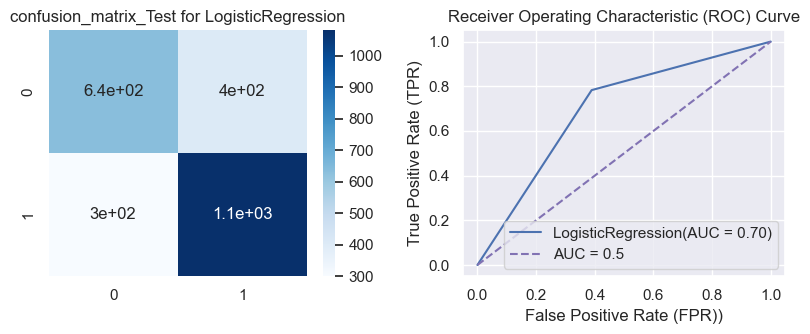

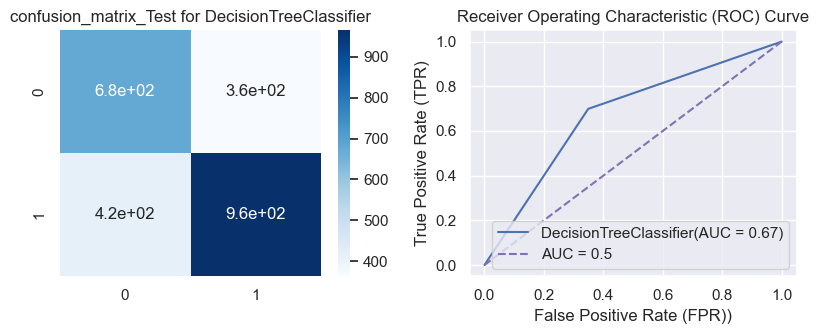

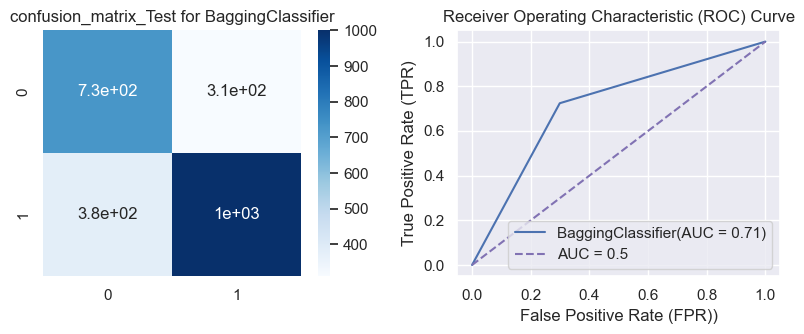

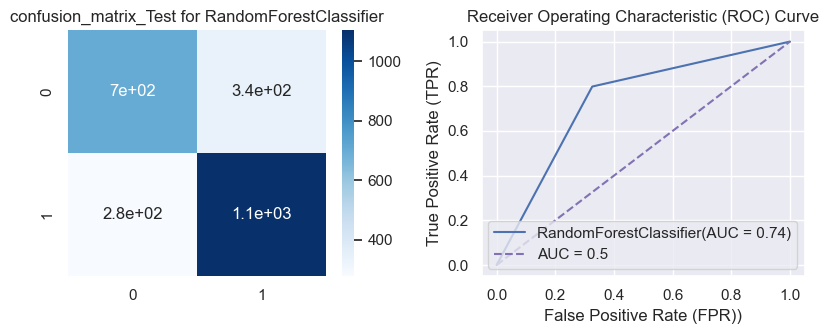

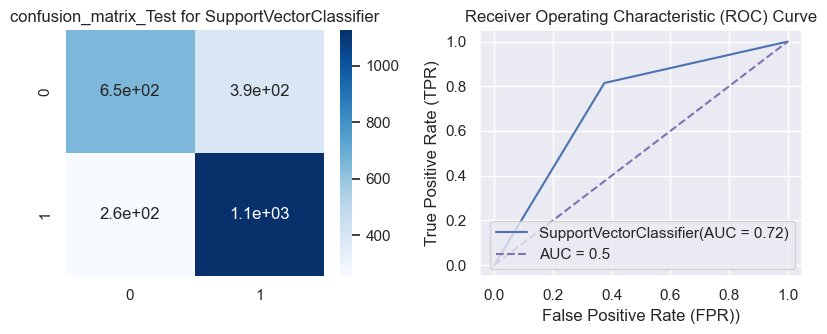

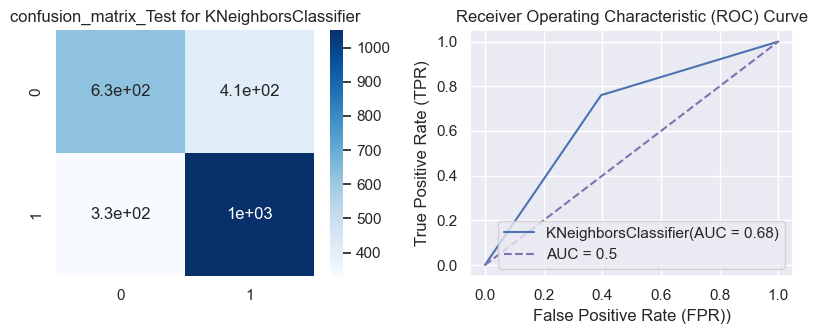

In [53]:
for model_name, model in models:
 model.fit(X_train,y_train)
 y_pred_train = model.predict(X_train)
 y_pred_test = model.predict(X_test)
 cm_test = confusion_matrix(y_test, y_pred_test)
 #y_test_binary = (y_test == 1).astype(int)
 #y_pred_test_binary = (y_pred_test == 1).astype(int)
 fpr, tpr, _ = roc_curve(y_test, y_pred_test, pos_label=1)
 roc_auc = auc(fpr, tpr)
 
 plt.figure(figsize = (8,3.5))
 plt.subplot(1,2,1)
 sns.heatmap(cm_test, annot = True, cmap= 'Blues')
 plt.title(f'confusion_matrix_Test for {model_name}')

 plt.subplot(1,2,2)
 plt.plot(fpr, tpr, label=f'{model_name}(AUC = {roc_auc:.2f})')
# Plot the diagonal line representing a random classifier (AUC = 0.5)
 plt.plot([0, 1], [0, 1], 'm--', label='AUC = 0.5')
# Set labels and title
 plt.xlabel('False Positive Rate (FPR))')
 plt.ylabel('True Positive Rate (TPR)')
 plt.title('Receiver Operating Characteristic (ROC) Curve')
 plt.legend(loc='lower right')
 plt.tight_layout()
# Show the plot
plt.show()

# conclusion:

By applying some algorithm the best model suits this dataset is Random Forest with Accuracy---75% and AUC curve---75%.